In [14]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 50)

# import networkx as nx
# from networkx.algorithms import bipartite
import igraph as ig

import matplotlib.pyplot as plt

# Data preparation

In [15]:
projects = pd.read_csv('../data/raw/cordis-HORIZONprojects-csv/csv/project.csv', delimiter=';')
projects.head()

,id,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,ecSignatureDate,frameworkProgramme,masterCall,subCall,fundingScheme,nature,objective,contentUpdateDate,rcn,grantDoi
0,101095387,AISym4MED,SIGNED,Synthetic and scalable data platform for medic...,2022-12-01,2026-11-30,6341765,6341765,HORIZON.2.1,HORIZON-HLTH-2022-IND-13-02,2022-11-22,HORIZON,HORIZON-HLTH-2022-IND-13,HORIZON-HLTH-2022-IND-13,RIA,NaN,AISym4Med aims at developing a platform that w...,2022-12-30 17:42:45,244110,10.3030/101095387
1,101062897,IMPROVE,SIGNED,IMaging PROstate cancer using ViscoElastic bio...,2023-09-01,2025-08-31,0,"181152,96",HORIZON.1.2,HORIZON-MSCA-2021-PF-01-01,2022-06-30,HORIZON,HORIZON-MSCA-2021-PF-01,HORIZON-MSCA-2021-PF-01,MSCA-PF,NaN,IMPROVE aims to demonstrate the potentiality o...,2022-08-26 02:24:17,240147,10.3030/101062897
2,101044731,SAINTBARTH,SIGNED,"Slavery, Abolition and Archipelagic Connection...",2024-01-01,2028-12-31,1992925,1992925,HORIZON.1.1,ERC-2021-COG,2022-07-11,HORIZON,ERC-2021-COG,ERC-2021-COG,HORIZON-AG,NaN,Surveys and datasets of the trans-Atlantic sla...,2022-08-26 14:59:15,240177,10.3030/101044731
3,101065876,TEMP-MOMO,SIGNED,Drivers of spatiotemporal variation in tempera...,2022-09-01,2024-08-31,0,"195914,88",HORIZON.1.2,HORIZON-MSCA-2021-PF-01-01,2022-07-13,HORIZON,HORIZON-MSCA-2021-PF-01,HORIZON-MSCA-2021-PF-01,HORIZON-AG-UN,NaN,Europe emerges as a major climate warming hots...,2022-08-26 15:30:46,240278,10.3030/101065876
4,101057389,CINDERELLA,SIGNED,Clinical Validation of an AI-based approach to...,2022-06-01,2026-05-31,5379050,5378299,HORIZON.2.1,HORIZON-HLTH-2021-DISEASE-04-04,2022-05-23,HORIZON,HORIZON-HLTH-2021-DISEASE-04,HORIZON-HLTH-2021-DISEASE-04,RIA,NaN,Breast cancer is the most commonly diagnosed c...,2022-09-04 13:43:33,241461,10.3030/101057389


In [16]:
organisations = pd.read_csv('../data/raw/cordis-HORIZONprojects-csv/csv/organization.csv', delimiter=';')
organisations.head()

,projectID,projectAcronym,organisationID,vatNumber,name,shortName,SME,activityType,street,postCode,city,country,nutsCode,geolocation,organizationURL,contactForm,contentUpdateDate,rcn,order,role,ecContribution,netEcContribution,totalCost,endOfParticipation,active
0,101095387,AISym4MED,908114874,BE0692797754,ZABALA BRUSSELS,ZABALA BRUSSELS,True,PRC,RUE BELLIARD 20,1040,BRUXELLES,BE,NaN,"50.840092,4.3814743",NaN,https://ec.europa.eu/info/funding-tenders/oppo...,2022-12-30 17:42:45,1954294,5,participant,464375.0,464375.0,464375,False,NaN
1,101095387,AISym4MED,900973055,FI29362646,SAIDOT OY,SAIDOT,True,PRC,TEKNIIKANTIE 2,02150,Espoo,FI,NaN,"60.1668875,24.7488936",NaN,https://ec.europa.eu/info/funding-tenders/oppo...,2022-12-30 17:42:45,1965161,11,participant,548750.0,548750.0,548750,False,NaN
2,101095387,AISym4MED,991228063,BE0890217005,TIME.LEX,time.lex,True,PRC,JOSEPH STEVENSSTRAAT 7,1000,BRUSSEL,BE,NaN,"50.8413225,4.3524748",NaN,https://ec.europa.eu/info/funding-tenders/oppo...,2022-12-30 17:42:45,2349568,7,participant,417187.5,417187.5,"417187,5",False,NaN
3,101095387,AISym4MED,999993468,GB649926678,IMPERIAL COLLEGE OF SCIENCE TECHNOLOGY AND MED...,Imperial,False,HES,SOUTH KENSINGTON CAMPUS EXHIBITION ROAD,SW7 2AZ,LONDON,UK,NaN,"51.5073219,-0.1276473",http://www.imperial.ac.uk,https://ec.europa.eu/info/funding-tenders/oppo...,2022-12-30 17:42:45,1905566,14,associatedPartner,NaN,0.0,NaN,False,NaN
4,101095387,AISym4MED,974142483,ESA50086412,INSTRUMENTACION Y COMPONENTES SA,NaN,False,PRC,CALLE ALAUN 8 PLA ZA,50197,ZARAGOZA,ES,NaN,"41.6410997,-0.9956188",www.inycom.es,https://ec.europa.eu/info/funding-tenders/oppo...,2022-12-30 17:42:45,2054577,2,participant,1205000.0,1205000.0,1205000,False,NaN


# Data analysis

In [17]:
organisations.columns

Index(['projectID', 'projectAcronym', 'organisationID', 'vatNumber', 'name',
       'shortName', 'SME', 'activityType', 'street', 'postCode', 'city',
       'country', 'nutsCode', 'geolocation', 'organizationURL', 'contactForm',
       'contentUpdateDate', 'rcn', 'order', 'role', 'ecContribution',
       'netEcContribution', 'totalCost', 'endOfParticipation', 'active'],
      dtype='object')

In [18]:
organisations.groupby('organisationID')['projectID'].count().sort_values(ascending=False)

organisationID
999997930    385
999984059    238
999991722    215
999979500    188
999991334    178
            ... 
909600041      1
909604794      1
909606734      1
909617986      1
936473600      1
Name: projectID, Length: 14393, dtype: int64

In [19]:
organisations[['organisationID', 'name', 'projectID', 'projectAcronym']].isna().sum()

organisationID    0
name              0
projectID         0
projectAcronym    0
dtype: int64

In [20]:
organisations[['organisationID', 'name', 'projectID', 'projectAcronym']].describe(include='all')

,organisationID,name,projectID,projectAcronym
count,4.026500e+04,40265,4.026500e+04,40265
unique,NaN,14381,NaN,5591
top,NaN,CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS,NaN,PARC
freq,NaN,385,NaN,199
mean,9.684783e+08,NaN,1.016786e+08,NaN
std,4.174491e+07,NaN,7.309709e+06,NaN
min,8.840175e+08,NaN,1.010390e+08,NaN
25%,9.332999e+08,NaN,1.010603e+08,NaN
50%,9.984544e+08,NaN,1.010728e+08,NaN
75%,9.998938e+08,NaN,1.010916e+08,NaN


In [21]:
organisations.groupby('name').count().sort_values(by='projectID', ascending=False)

,projectID,projectAcronym,organisationID,vatNumber,shortName,SME,activityType,street,postCode,city,country,nutsCode,geolocation,organizationURL,contactForm,contentUpdateDate,rcn,order,role,ecContribution,netEcContribution,totalCost,endOfParticipation,active
name,,,,,,,,,,,,,,,,,,,,,,,,
CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS,385,385,385,385,385,385,385,385,385,385,385,0,385,385,385,385,385,385,385,368,374,368,385,0
FRAUNHOFER GESELLSCHAFT ZUR FORDERUNG DER ANGEWANDTEN FORSCHUNG EV,238,238,238,238,238,238,238,238,238,238,238,0,238,238,238,238,238,238,238,234,237,235,238,0
AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGACIONES CIENTIFICAS,215,215,215,215,215,215,215,215,215,215,215,0,215,215,215,215,215,215,215,206,214,206,215,0
CONSIGLIO NAZIONALE DELLE RICERCHE,188,188,188,188,188,188,188,188,188,188,188,0,188,188,188,188,188,188,188,184,188,185,188,0
KATHOLIEKE UNIVERSITEIT LEUVEN,178,178,178,178,178,178,178,178,178,178,178,0,178,178,178,178,178,178,178,168,177,168,178,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRADYENT B.V.,1,1,1,1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0
GRAI MATTER LABS BV,1,1,1,1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0
GRAINSENSE OY,1,1,1,1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,0,1,0


In [22]:
organisations[['organisationID', 'name', 'projectID', 'projectAcronym']].values

array([[908114874, 'ZABALA BRUSSELS', 101095387, 'AISym4MED'],
       [900973055, 'SAIDOT OY', 101095387, 'AISym4MED'],
       [991228063, 'TIME.LEX', 101095387, 'AISym4MED'],
       ...,
       [999990946, 'KUNGLIGA TEKNISKA HOEGSKOLAN', 101045453, 'fitsCAN'],
       [999522921, 'REGION STOCKHOLM', 101045453, 'fitsCAN'],
       [969818320,
        'NATIONAL SCIENCE CENTER KHARKOV INSTITUTE OF PHYSICS AND TECHNOLOGY',
        101072693, 'UAinEuratom21']], dtype=object)

In [23]:
G = ig.Graph.TupleList(
      edges=organisations[['name', 'projectAcronym']].values,
      directed=False
      )

In [24]:
is_bipartite, types = G.is_bipartite(return_types = True)
is_bipartite

False

Why isn't it bipartite?

In [25]:
organisations[organisations.name.isin(organisations.projectAcronym.values)]

,projectID,projectAcronym,organisationID,vatNumber,name,shortName,SME,activityType,street,postCode,city,country,nutsCode,geolocation,organizationURL,contactForm,contentUpdateDate,rcn,order,role,ecContribution,netEcContribution,totalCost,endOfParticipation,active
2232,101072531,QTOX,954831141,BE0816726637,ARCHE,ARCHE,True,PRC,LIEFKENSSTRAAT 35D,9032,GENT,BE,NaN,"51.0962677,3.7096084",www.arche-consulting.be,https://ec.europa.eu/info/funding-tenders/oppo...,2022-09-13 16:27:56,2184086,12,associatedPartner,NaN,0.0,NaN,False,NaN
3266,101060455,NutriBudget,891575501,BE0759550580,IMPACT,NaN,False,OTH,BIEZEWEG 15 A,9230,WETTEREN,BE,NaN,"50.991288850000004,3.842148629369313",NaN,https://ec.europa.eu/info/funding-tenders/oppo...,2022-09-05 08:18:50,1976668,15,participant,118125.0,118125.0,118125,False,NaN
7674,101096925,6Green,904841221,FR60378615363,SMILE,NaN,False,PRC,163 QUAI DU DOCTEUR DERVAUX,92600,ASNIERES-SUR-SEINE,FR,NaN,"48.9120236,2.2919099",NaN,https://ec.europa.eu/info/funding-tenders/oppo...,2022-11-25 10:01:44,1955702,15,participant,301500.0,301500.0,335000,False,NaN
7847,101056715,TranSensus LCA,948382969,BE0874269017,RECHARGE,RECHARGE,False,OTH,AVENUE DE TERVUEREN 168 3,1150,BRUXELLES,BE,NaN,"50.8389711,4.4004079",NaN,https://ec.europa.eu/info/funding-tenders/oppo...,2022-12-16 13:27:51,2409971,30,associatedPartner,NaN,0.0,0,False,NaN
10635,101100680,GN5-1,999643977,CHE101494993MWST,SWITCH,SWITCH,True,OTH,EFFINGERSTRASSE 15,3008,BERN,CH,NaN,"46.9456653,7.4353006",NaN,https://ec.europa.eu/info/funding-tenders/oppo...,2022-11-12 14:29:34,2429588,36,associatedPartner,NaN,0.0,0,False,NaN
11091,101071418,NAVALGO,888824096,FR25882417314,NAVALGO,NaN,True,PRC,2 AVENUE DU 1ER MAI,91120,PALAISEAU,FR,NaN,"48.7135733,2.257253027706862",NaN,https://ec.europa.eu/info/funding-tenders/oppo...,2022-08-16 18:02:42,1975578,1,coordinator,75000.0,75000.0,0,False,NaN
11304,101071430,INNOVHEM,888892093,FR77877815522,INNOVHEM,NaN,False,PRC,4 RUE PIERRE FONTAINE,91000,EVRY-COURCOURONNES,FR,NaN,"48.6200609,2.4521212",NaN,https://ec.europa.eu/info/funding-tenders/oppo...,2022-08-10 17:31:59,1975324,1,coordinator,75000.0,75000.0,0,False,NaN
13607,101084106,FOLOU,891575501,BE0759550580,IMPACT,NaN,False,OTH,BIEZEWEG 15 A,9230,WETTEREN,BE,NaN,"50.991288850000004,3.842148629369313",NaN,https://ec.europa.eu/info/funding-tenders/oppo...,2022-10-06 17:58:41,1976668,12,participant,203125.0,203125.0,203125,False,NaN
13724,101060835,NOVAFERT,891575501,BE0759550580,IMPACT,NaN,False,OTH,BIEZEWEG 15 A,9230,WETTEREN,BE,NaN,"50.991288850000004,3.842148629369313",NaN,https://ec.europa.eu/info/funding-tenders/oppo...,2022-09-04 13:00:22,1976668,8,participant,179375.0,179375.0,179375,False,NaN
17611,101092562,ICOS,929760424,FR42501594964,AENEAS,ASSOCIATION OF EUROPEAN NANOELECTRONICS ACTIVI...,False,OTH,44 RUE CAMBRONNE,75015,PARIS,FR,NaN,"48.8310756,2.3338323",NaN,https://ec.europa.eu/info/funding-tenders/oppo...,2022-12-09 15:35:07,2567939,8,participant,101700.0,101700.0,101700,False,NaN


In [26]:
G = ig.Graph.TupleList(
      edges=organisations[['organisationID', 'projectID']].values,
      vertex_name_attr='id',
      directed=False
      )

In [27]:
is_bipartite, types = G.is_bipartite(return_types = True)
is_bipartite

True

In [28]:
types[0]

False

In [29]:
G.vs[0]

igraph.Vertex(<igraph.Graph object at 0x11c7c6340>, 0, {'id': 908114874})

In [30]:
G_org_projection = G.bipartite_projection(types=types, which=False)

In [31]:
G_org_projection.summary()

'IGRAPH U-W- 14393 347142 -- \n+ attr: id (v), weight (e)'

In [32]:
G_org_projection.is_connected()

False

In [33]:
components = G_org_projection.connected_components()

In [34]:
len(components)

343

In [35]:
components[0]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,

In [36]:
len(components[0])

14028

In [37]:
components[1]

[30]

In [38]:
30 in components[0]

False

In [39]:
G_org_projection.vs[30]

igraph.Vertex(<igraph.Graph object at 0x11b424d40>, 30, {'id': 898864178})

In [40]:
organisations[organisations.organisationID == 898864178]

,projectID,projectAcronym,organisationID,vatNumber,name,shortName,SME,activityType,street,postCode,city,country,nutsCode,geolocation,organizationURL,contactForm,contentUpdateDate,rcn,order,role,ecContribution,netEcContribution,totalCost,endOfParticipation,active
30,190173745,WILLEM: AI to Reduce Cardiovascular Diseases,898864178,ESB88119862,IDOVEN 1903 SL,NaN,True,PRC,C/PRINCIPE DE VERGARA 128 ESC DR PISO EN,28002,Madrid,ES,NaN,"40.4167047,-3.7035825",NaN,https://ec.europa.eu/info/funding-tenders/oppo...,2022-10-17 19:32:11,1968745,1,coordinator,2500000.0,2500000.0,3596296,False,NaN


In [41]:
organisations[organisations.projectID == 190173745]

,projectID,projectAcronym,organisationID,vatNumber,name,shortName,SME,activityType,street,postCode,city,country,nutsCode,geolocation,organizationURL,contactForm,contentUpdateDate,rcn,order,role,ecContribution,netEcContribution,totalCost,endOfParticipation,active
30,190173745,WILLEM: AI to Reduce Cardiovascular Diseases,898864178,ESB88119862,IDOVEN 1903 SL,NaN,True,PRC,C/PRINCIPE DE VERGARA 128 ESC DR PISO EN,28002,Madrid,ES,NaN,"40.4167047,-3.7035825",NaN,https://ec.europa.eu/info/funding-tenders/oppo...,2022-10-17 19:32:11,1968745,1,coordinator,2500000.0,2500000.0,3596296,False,NaN


Check this out https://cordis.europa.eu/project/id/190173745

In [42]:
H = G_org_projection.connected_components().giant()

In [43]:
H.summary()

'IGRAPH U-W- 14028 347103 -- \n+ attr: id (v), weight (e)'

In [44]:
H.vcount() / G_org_projection.vcount() * 100

97.46404502188564

In [45]:
path_lengths = G_org_projection.path_length_hist()
print(path_lengths)

N = 98385417, mean +- sd: 2.7387 +- 0.4996
Each * represents 1157180 items
[1, 2):  (347142)
[2, 3): *********************** (27407538)
[3, 4): *********************************************************** (68273645)
[4, 5): ** (2317770)
[5, 6):  (38706)
[6, 7):  (616)


In [46]:
G_org_projection.neighborhood(1)

[1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [47]:
H = G_org_projection.induced_subgraph(G_org_projection.neighborhood(1))
H.summary()

'IGRAPH U-W- 15 105 -- \n+ attr: id (v), weight (e)'

<AxesSubplot:>

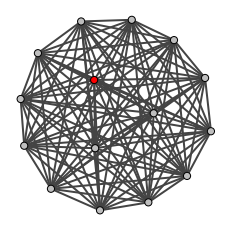

In [48]:
H.vs['color'] = 'grey'
H.vs[0]['color'] = 'red'
fig, ax = plt.subplots()
ig.plot(H, target=ax)

In [49]:
G_org_projection.transitivity_local_undirected(1)

1.0

In [50]:
G_org_projection.transitivity_avglocal_undirected()

0.8333902284719598

In [51]:
G_org_projection.degree(1)

14

In [52]:
G_org_projection.vs['degree'] = G_org_projection.degree()

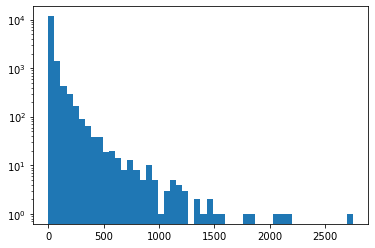

In [53]:
plt.hist(G_org_projection.vs['degree'], 50);
plt.yscale('log')

In [54]:
highest_degree = sorted(G_org_projection.vs, key=lambda v: v['degree'], reverse=True)

In [55]:
highest_degree[:5]

[igraph.Vertex(<igraph.Graph object at 0x11b424d40>, 76, {'id': 999984059, 'degree': 2750}),
 igraph.Vertex(<igraph.Graph object at 0x11b424d40>, 102, {'id': 999997930, 'degree': 2192}),
 igraph.Vertex(<igraph.Graph object at 0x11b424d40>, 223, {'id': 999979500, 'degree': 2105}),
 igraph.Vertex(<igraph.Graph object at 0x11b424d40>, 118, {'id': 999991722, 'degree': 2063}),
 igraph.Vertex(<igraph.Graph object at 0x11b424d40>, 106, {'id': 999992401, 'degree': 1820})]

In [56]:
organisations[organisations.organisationID == 999984059].head()

,projectID,projectAcronym,organisationID,vatNumber,name,shortName,SME,activityType,street,postCode,city,country,nutsCode,geolocation,organizationURL,contactForm,contentUpdateDate,rcn,order,role,ecContribution,netEcContribution,totalCost,endOfParticipation,active
76,101057091,ODELIA,999984059,DE129515865,FRAUNHOFER GESELLSCHAFT ZUR FORDERUNG DER ANGE...,Fraunhofer,False,REC,HANSASTRASSE 27C,80686,MUNCHEN,DE,NaN,"48.1322664,11.5296222",http://www.fraunhofer.de,https://ec.europa.eu/info/funding-tenders/oppo...,2022-11-25 10:03:29,1905912,8,participant,1289157.50,1289157.50,"1289157,5",False,NaN
505,101086317,EULIAA,999984059,DE129515865,FRAUNHOFER GESELLSCHAFT ZUR FORDERUNG DER ANGE...,Fraunhofer,False,REC,HANSASTRASSE 27C,80686,MUNCHEN,DE,NaN,"48.1322664,11.5296222",http://www.fraunhofer.de,https://ec.europa.eu/info/funding-tenders/oppo...,2022-11-17 18:04:15,1905912,1,coordinator,1035000.00,1035000.00,1035000,False,NaN
516,101075527,WEDUSEA,999984059,DE129515865,FRAUNHOFER GESELLSCHAFT ZUR FORDERUNG DER ANGE...,Fraunhofer,False,REC,HANSASTRASSE 27C,80686,MUNCHEN,DE,NaN,"48.1322664,11.5296222",http://www.fraunhofer.de,https://ec.europa.eu/info/funding-tenders/oppo...,2022-09-15 14:27:48,1905912,4,participant,1011152.50,1011152.50,"1011152,5",False,NaN
667,101081983,TRANTOR,999984059,DE129515865,FRAUNHOFER GESELLSCHAFT ZUR FORDERUNG DER ANGE...,Fraunhofer,False,REC,HANSASTRASSE 27C,80686,MUNCHEN,DE,NaN,"48.1322664,11.5296222",http://www.fraunhofer.de,https://ec.europa.eu/info/funding-tenders/oppo...,2023-03-10 22:01:51,1905912,2,participant,440431.00,440431.00,"440431,25",False,NaN
686,101096239,RETICLES,999984059,DE129515865,FRAUNHOFER GESELLSCHAFT ZUR FORDERUNG DER ANGE...,Fraunhofer,False,REC,HANSASTRASSE 27C,80686,MUNCHEN,DE,NaN,"48.1322664,11.5296222",http://www.fraunhofer.de,https://ec.europa.eu/info/funding-tenders/oppo...,2022-12-16 14:23:17,1905912,2,participant,1408146.25,1408146.25,"1408146,25",False,NaN


In [57]:
G_org_projection.vs['betweenness'] = G_org_projection.betweenness()

In [58]:
list(G_org_projection.vs)

[igraph.Vertex(<igraph.Graph object at 0x11b424d40>, 0, {'id': 908114874, 'degree': 92, 'betweenness': 25225.31237032828}),
 igraph.Vertex(<igraph.Graph object at 0x11b424d40>, 1, {'id': 900973055, 'degree': 14, 'betweenness': 0.0}),
 igraph.Vertex(<igraph.Graph object at 0x11b424d40>, 2, {'id': 991228063, 'degree': 213, 'betweenness': 73285.24281433146}),
 igraph.Vertex(<igraph.Graph object at 0x11b424d40>, 3, {'id': 999993468, 'degree': 812, 'betweenness': 706251.8898758915}),
 igraph.Vertex(<igraph.Graph object at 0x11b424d40>, 4, {'id': 974142483, 'degree': 40, 'betweenness': 1233.956022155993}),
 igraph.Vertex(<igraph.Graph object at 0x11b424d40>, 5, {'id': 994498030, 'degree': 26, 'betweenness': 1471.6388930504427}),
 igraph.Vertex(<igraph.Graph object at 0x11b424d40>, 6, {'id': 993205990, 'degree': 44, 'betweenness': 1379.2520180818}),
 igraph.Vertex(<igraph.Graph object at 0x11b424d40>, 7, {'id': 904226435, 'degree': 14, 'betweenness': 0.0}),
 igraph.Vertex(<igraph.Graph object

In [84]:
G_org_projection.vs['id']

[908114874,
 900973055,
 991228063,
 999993468,
 974142483,
 994498030,
 993205990,
 904226435,
 923428652,
 999915189,
 942305822,
 999976396,
 999894916,
 997592427,
 937405091,
 999882015,
 999975620,
 999985029,
 999997833,
 951414122,
 915056194,
 903770826,
 999513706,
 999838850,
 999880754,
 998129904,
 953176030,
 999841081,
 999857377,
 967498371,
 898864178,
 999836134,
 999886962,
 999992983,
 999991043,
 999895886,
 889053016,
 886516854,
 999849423,
 889066014,
 902999288,
 889065529,
 999879881,
 906029762,
 999984350,
 889054374,
 889059709,
 917939810,
 999974359,
 998802502,
 998440110,
 999858929,
 999977463,
 995992024,
 969231858,
 921037796,
 999887350,
 999840111,
 941437672,
 949928276,
 955484436,
 997604843,
 999993953,
 991016991,
 999981634,
 999993274,
 889060291,
 999991334,
 999543776,
 999531360,
 999642716,
 999954474,
 950478945,
 995163935,
 999977172,
 999897632,
 999984059,
 919570865,
 892057785,
 999633113,
 889512505,
 999897729,
 999907720,
 999

In [93]:
org_names = pd.DataFrame(G_org_projection.vs['id'], columns=['id'])
org_names = pd.merge(org_names, organisations[['organisationID', 'name']].drop_duplicates(), 
         left_on='id', 
         right_on='organisationID', 
         how='left')
org_names

,id,organisationID,name
0,908114874,908114874,ZABALA BRUSSELS
1,900973055,900973055,SAIDOT OY
2,991228063,991228063,TIME.LEX
3,999993468,999993468,IMPERIAL COLLEGE OF SCIENCE TECHNOLOGY AND MED...
4,974142483,974142483,INSTRUMENTACION Y COMPONENTES SA
...,...,...,...
14388,954543924,954543924,BOLCSESZETTUDOMANYI KUTATOKOZPONT
14389,998763993,998763993,FUNDACION CENTRO DE ESTUDIOS MONETARIOS Y FINA...
14390,998692601,998692601,LEIBNIZ-INSTITUT FUR ASTROPHYSIK POTSDAM (AIP)
14391,997819213,997819213,LEIBNIZ-INSTITUT FUR ANGEWANDTE GEOPHYSIK


In [94]:
G_org_projection.vs['name'] = org_names['name']

In [95]:
list(G_org_projection.vs)

[igraph.Vertex(<igraph.Graph object at 0x11b424d40>, 0, {'id': 908114874, 'degree': 92, 'betweenness': 25225.31237032828, 'name': 'ZABALA BRUSSELS'}),
 igraph.Vertex(<igraph.Graph object at 0x11b424d40>, 1, {'id': 900973055, 'degree': 14, 'betweenness': 0.0, 'name': 'SAIDOT OY'}),
 igraph.Vertex(<igraph.Graph object at 0x11b424d40>, 2, {'id': 991228063, 'degree': 213, 'betweenness': 73285.24281433146, 'name': 'TIME.LEX'}),
 igraph.Vertex(<igraph.Graph object at 0x11b424d40>, 3, {'id': 999993468, 'degree': 812, 'betweenness': 706251.8898758915, 'name': 'IMPERIAL COLLEGE OF SCIENCE TECHNOLOGY AND MEDICINE'}),
 igraph.Vertex(<igraph.Graph object at 0x11b424d40>, 4, {'id': 974142483, 'degree': 40, 'betweenness': 1233.956022155993, 'name': 'INSTRUMENTACION Y COMPONENTES SA'}),
 igraph.Vertex(<igraph.Graph object at 0x11b424d40>, 5, {'id': 994498030, 'degree': 26, 'betweenness': 1471.6388930504427, 'name': 'IBERMATICA SA'}),
 igraph.Vertex(<igraph.Graph object at 0x11b424d40>, 6, {'id': 9932

In [97]:
organisations[organisations.organisationID == 996116087]

,projectID,projectAcronym,organisationID,vatNumber,name,shortName,SME,activityType,street,postCode,city,country,nutsCode,geolocation,organizationURL,contactForm,contentUpdateDate,rcn,order,role,ecContribution,netEcContribution,totalCost,endOfParticipation,active
1310,101095759,Hexa-X-II,996116087,DK13680531,NOKIA DENMARK AS,NaN,False,PRC,ORESTADS BOULEVARD 73,2300,Copenhagen,DK,NaN,"55.6269995,12.577656605851782",NaN,https://ec.europa.eu/info/funding-tenders/oppo...,2022-11-25 10:03:04,2558957,15,participant,200677.5,200677.5,222975,False,NaN
15207,101095738,6G-SHINE,996116087,DK13680531,NOKIA DENMARK AS,NaN,False,PRC,ORESTADS BOULEVARD 73,2300,Copenhagen,DK,NaN,"55.6269995,12.577656605851782",NaN,https://ec.europa.eu/info/funding-tenders/oppo...,2022-11-25 16:34:17,2558957,2,participant,204806.0,204806.0,"227562,5",False,NaN
